# Data cleaning and exploration

## 0 Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv("../dat/dips/DIPS_Data.csv", sep = ",", low_memory = False)


## 1 Data Cleaning

### 1.1 Predictors and target

In [3]:
data.head()

,code,okayt1,okayt2,teilt2,intnr,datum,s1,s2,s3,s4,...,alk30,litbiery,litweiny,litspiry,litalky,grambiry,gramweiy,gramspiy,gramalky,filter_$
0,33,1,1,1,5,9/6/1996,74,1,3,1,...,0,0,.2,0,.2,0,20,0,20,1
1,35,1,1,1,21,9/21/1996,74,1,3,1,...,0,5.6,.375,.0045,5.9795,224,37.5,1.8,263.3,1
2,37,2,1,1,16,9/17/1996,74,2,3,1,...,0,.0625,.05,.00703125,.11953125,2.5,5,2.8125,10.3125,0
3,51,1,1,1,5,9/9/1996,75,1,3,1,...,0,0,.3,.005625,.305625,0,30,2.25,32.25,1
4,56,1,1,1,10,5/30/1997,75,1,3,1,...,1,.75,2.2,.01125,2.96125,30,220,4.5,254.5,1


#### Predictors

In [4]:
predictors = ["whi_ges", "soz_ges", "gke_ges", "lzh_ges",
              "ile_sum1", "ile_sum2", "woc_gesp", "woc_gese",
              "asi_ges", "bsq_ges", "das_ges", "scl_gsi",
              # "scl_pst", "scl_psdi"
              ]

predictors_y = ["whi_gesy", "soz_gesy", "gke_gesy", "lzh_gesy",
                "asi_gesy", "bsq_gesy", "das_gesy", "scl_gsiy",
                # "scl_psty"
                ]

predictor_names = ["Positive mental health",    #whi_ges
                   "Social support",            #soz_ges (SAVE)
                   "General self-efficacy",     #gke_ges SAVE
                   "Life satisfaction",         #lzh_ges SAVE
                   "Stress 1",                  #ile_sum1 SAVE (life events?)
                   "Stress 2",                  #ile_sum2 SAVE (daily hassles?)
                   "Problem-focused coping",    #woc_gesp SAVE
                   "Emotion-focused coping",    #woc_gese SAVE
                   "Anxiety sensitivity",       #asi_ges SAVE
                   "Fear of Bodily Sensations", #bsq_ges SAVE
                   "Dysfunctional attitudes",   #das_ges SAVE
                   "General Psychopathology: Global Severity Index (GSI)",    #scl_gsi SAVE
                   # "General Psychopathology: Positive Symptom Total (PST)",    #scl_pst SAVE
                   # "General Psychopathology: Positive Symptom Distress Index (PSDI)"    #scl_psdi SAVE
                   ]

extra_preds = ["fqn_ges",
               # "fq_ag", "fq_s", "fq_bi",
               "bdi_ges", "bai_ges",
               # "bdi_bel", "bai_bel",
               "ifa_int", "ifa_ext"]

extra_preds_y = ["fqn_gesy",
                 # "fq_agy", "fq_sy", "fq_biy",
                 "bdi_gesy", "bai_gesy",
                 # "bdi_bely", "bai_bely",
                 "ifa_inty", "ifa_exty"]


extra_preds_names = ["Phobia total",                     #fqn_ges (SAVE)
                     # "Agoraphobia",                      #fq_ag
                     # "Social phobia",                    #fq_s
                     # "Blood/Injection phobia",           #fq_bi
                     "Beck Depression Inventory",        #bdi_ges (SAVE)
                     # "Dysfunctional beliefs (from BDI)", #bdi_bel (SAVE)
                     "Beck Anxiety Inventory",           #bai_ges (SAVE)
                     # "Dysfunctional beliefs (from BAI)", #bai_bel (SAVE)
                     "Internal focus of attention", #ifa_int
                     "External focus of attention" #ifa_ext
                     ]

demographics = ["bild", "bmi_kat", "ses_kom"]

demographics_y = ["bmi_katy"]

#### Target

In [5]:
# get all columns that start with "hpi" but NOT "hpis"
hpi_cols = [col for col in data.columns if col.startswith('hpi') and not col.startswith('hpis')]

data['hpi'] = data[hpi_cols].apply(lambda x: 1 if any(x == 2) else 0, axis = 1)

# count the number of rows with a value of 1 in the new column
data['hpi'].value_counts(normalize = True)

hpi
0    0.721717
1    0.278283
Name: proportion, dtype: float64

In [6]:
data = data[predictors + extra_preds + demographics + predictors_y + extra_preds_y + demographics_y + ["hpi"]]

### 1.2 Missing values

In [7]:
data = data.replace(" ", np.nan)

In [8]:
for col in data.columns:
    print(data[col].value_counts())

whi_ges
1     396
0     332
2     261
3     176
4      96
5      60
6      46
7      23
8      14
10     11
9       7
11      4
12      1
13      1
Name: count, dtype: int64
soz_ges
4.77272727272727    77
4.72727272727273    74
4.86363636363636    72
4.68181818181818    72
4.54545454545454    71
                    ..
3.8                  1
4.42857142857143     1
2.59090909090909     1
1.86363636363636     1
3.47619047619048     1
Name: count, Length: 91, dtype: int64
gke_ges
30    166
29    154
28    132
27    120
31    102
25    101
26    100
32     83
24     69
34     61
33     55
23     44
35     43
22     33
36     32
20     21
21     21
37     20
39     13
19     10
18      9
38      8
17      7
40      6
16      5
15      4
14      3
12      2
10      1
13      1
11      1
Name: count, dtype: int64
lzh_ges
3.83333333333333    111
4                    89
3.75                 89
3.5                  86
3.58333333333333     79
                   ... 
1.09090909090909      1
4.63636

In [9]:
data["ses_kom"] = data["ses_kom"].replace(99, np.nan)

In [10]:
# drop NA values
print(len(data))
data = data.dropna()
print(len(data))

1538
1229


### 1.3 Data types

In [11]:
for col in data.columns:
    print(col, data[col].dtype)

whi_ges object
soz_ges object
gke_ges object
lzh_ges object
ile_sum1 object
ile_sum2 object
woc_gesp object
woc_gese object
asi_ges object
bsq_ges object
das_ges object
scl_gsi object
fqn_ges object
bdi_ges object
bai_ges object
ifa_int object
ifa_ext object
bild object
bmi_kat object
ses_kom float64
whi_gesy object
soz_gesy object
gke_gesy object
lzh_gesy object
asi_gesy object
bsq_gesy object
das_gesy object
scl_gsiy object
fqn_gesy object
bdi_gesy object
bai_gesy object
ifa_inty object
ifa_exty object
bmi_katy object
hpi int64


In [12]:
# convert all columns to float
data = data.astype(float)

for col in data.columns:
    print(col, data[col].dtype)

whi_ges float64
soz_ges float64
gke_ges float64
lzh_ges float64
ile_sum1 float64
ile_sum2 float64
woc_gesp float64
woc_gese float64
asi_ges float64
bsq_ges float64
das_ges float64
scl_gsi float64
fqn_ges float64
bdi_ges float64
bai_ges float64
ifa_int float64
ifa_ext float64
bild float64
bmi_kat float64
ses_kom float64
whi_gesy float64
soz_gesy float64
gke_gesy float64
lzh_gesy float64
asi_gesy float64
bsq_gesy float64
das_gesy float64
scl_gsiy float64
fqn_gesy float64
bdi_gesy float64
bai_gesy float64
ifa_inty float64
ifa_exty float64
bmi_katy float64
hpi float64


In [13]:
# mean of ile columns
data["ile"] = data[["ile_sum1", "ile_sum2"]].mean(axis = 1)
data = data.drop(["ile_sum1", "ile_sum2"], axis = 1)

predictors = ["whi_ges", "soz_ges", "gke_ges", "lzh_ges",
              "ile", "woc_gesp", "woc_gese",
              "asi_ges", "bsq_ges", "das_ges", "scl_gsi",
              ]

In [14]:
# calculate change from baseline to follow-up
data["whi_change"] = data["whi_gesy"] - data["whi_ges"]
data["soz_change"] = data["soz_gesy"] - data["soz_ges"]
data["gke_change"] = data["gke_gesy"] - data["gke_ges"]
data["lzh_change"] = data["lzh_gesy"] - data["lzh_ges"]
data["asi_change"] = data["asi_gesy"] - data["asi_ges"]
data["bsq_change"] = data["bsq_gesy"] - data["bsq_ges"]
data["das_change"] = data["das_gesy"] - data["das_ges"]
data["scl_change"] = data["scl_gsiy"] - data["scl_gsi"]

change_preds = ["whi_change", "soz_change", "gke_change", "lzh_change",
                "asi_change", "bsq_change", "das_change", "scl_change"]

In [15]:
# data = data[predictors + extra_preds + demographics + predictors_y + extra_preds_y + demographics_y + ["hpi"]]
# data = data[predictors + demographics + predictors_y  + ["hpi"]]
data = data[predictors + demographics + change_preds  + ["hpi"]]

In [16]:
data

,whi_ges,soz_ges,gke_ges,lzh_ges,ile,woc_gesp,woc_gese,asi_ges,bsq_ges,das_ges,...,ses_kom,whi_change,soz_change,gke_change,lzh_change,asi_change,bsq_change,das_change,scl_change,hpi
0,6.0,3.454545,24.0,2.666667,10.5,30.0,22.0,25.0,2.294118,130.0,...,2.0,-5.0,1.227273,8.0,1.000000,-20.0,-1.000000,-53.0,-0.744444,0.0
1,3.0,4.181818,28.0,4.000000,4.5,34.0,12.0,16.0,1.588235,139.0,...,3.0,-2.0,0.181818,3.0,0.000000,-6.0,-0.294118,-3.0,-0.100000,0.0
4,10.0,4.045455,27.0,3.000000,4.5,28.0,42.0,15.0,1.647059,127.0,...,2.0,-2.0,0.227273,1.0,0.250000,6.0,-0.294118,-8.0,0.366667,0.0
5,1.0,4.909091,29.0,3.750000,2.0,17.0,20.0,10.0,2.117647,117.0,...,3.0,-1.0,0.090909,3.0,0.333333,-7.0,-0.764706,-14.0,-0.044444,0.0
6,2.0,3.409091,31.0,3.000000,3.5,22.0,21.0,0.0,1.000000,153.0,...,2.0,-1.0,1.590909,4.0,1.272727,2.0,0.058824,-61.0,-0.122222,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1531,1.0,4.545455,23.0,3.583333,1.5,14.0,22.0,17.0,1.812500,123.0,...,2.0,0.0,-0.090909,2.0,0.500000,-7.0,0.363971,-30.0,0.142946,0.0
1533,1.0,4.000000,26.0,4.083333,2.5,25.0,23.0,21.0,2.117647,142.0,...,2.0,0.0,0.409091,-3.0,-0.750000,0.0,-0.176471,-33.0,-0.255556,0.0
1534,1.0,4.136364,27.0,3.666667,5.0,32.0,30.0,3.0,1.058824,109.0,...,2.0,0.0,-0.045455,2.0,0.750000,8.0,0.294118,-20.0,-0.033333,0.0
1535,2.0,3.545455,30.0,3.416667,5.0,25.0,31.0,14.0,2.000000,133.0,...,2.0,-2.0,0.045455,-2.0,0.333333,-3.0,-0.294118,-7.0,-0.577778,0.0


### 1.4 Standardization

In [17]:
scaler = StandardScaler()
# data[predictors + predictors_y] = scaler.fit_transform(data[predictors + predictors_y])
data[predictors + demographics + change_preds] = scaler.fit_transform(data[predictors + demographics + change_preds])

## 2 Data Exploration

### 2.1 Descriptive statistics

### 2.2 Correlation

In [18]:
data_pred = data[predictors  + demographics + ["hpi"]]
# data_pred_y = data[predictors_y + demographics + ["hpi"]]

Text(0.5, 1.0, 'Correlation matrix of predictors')

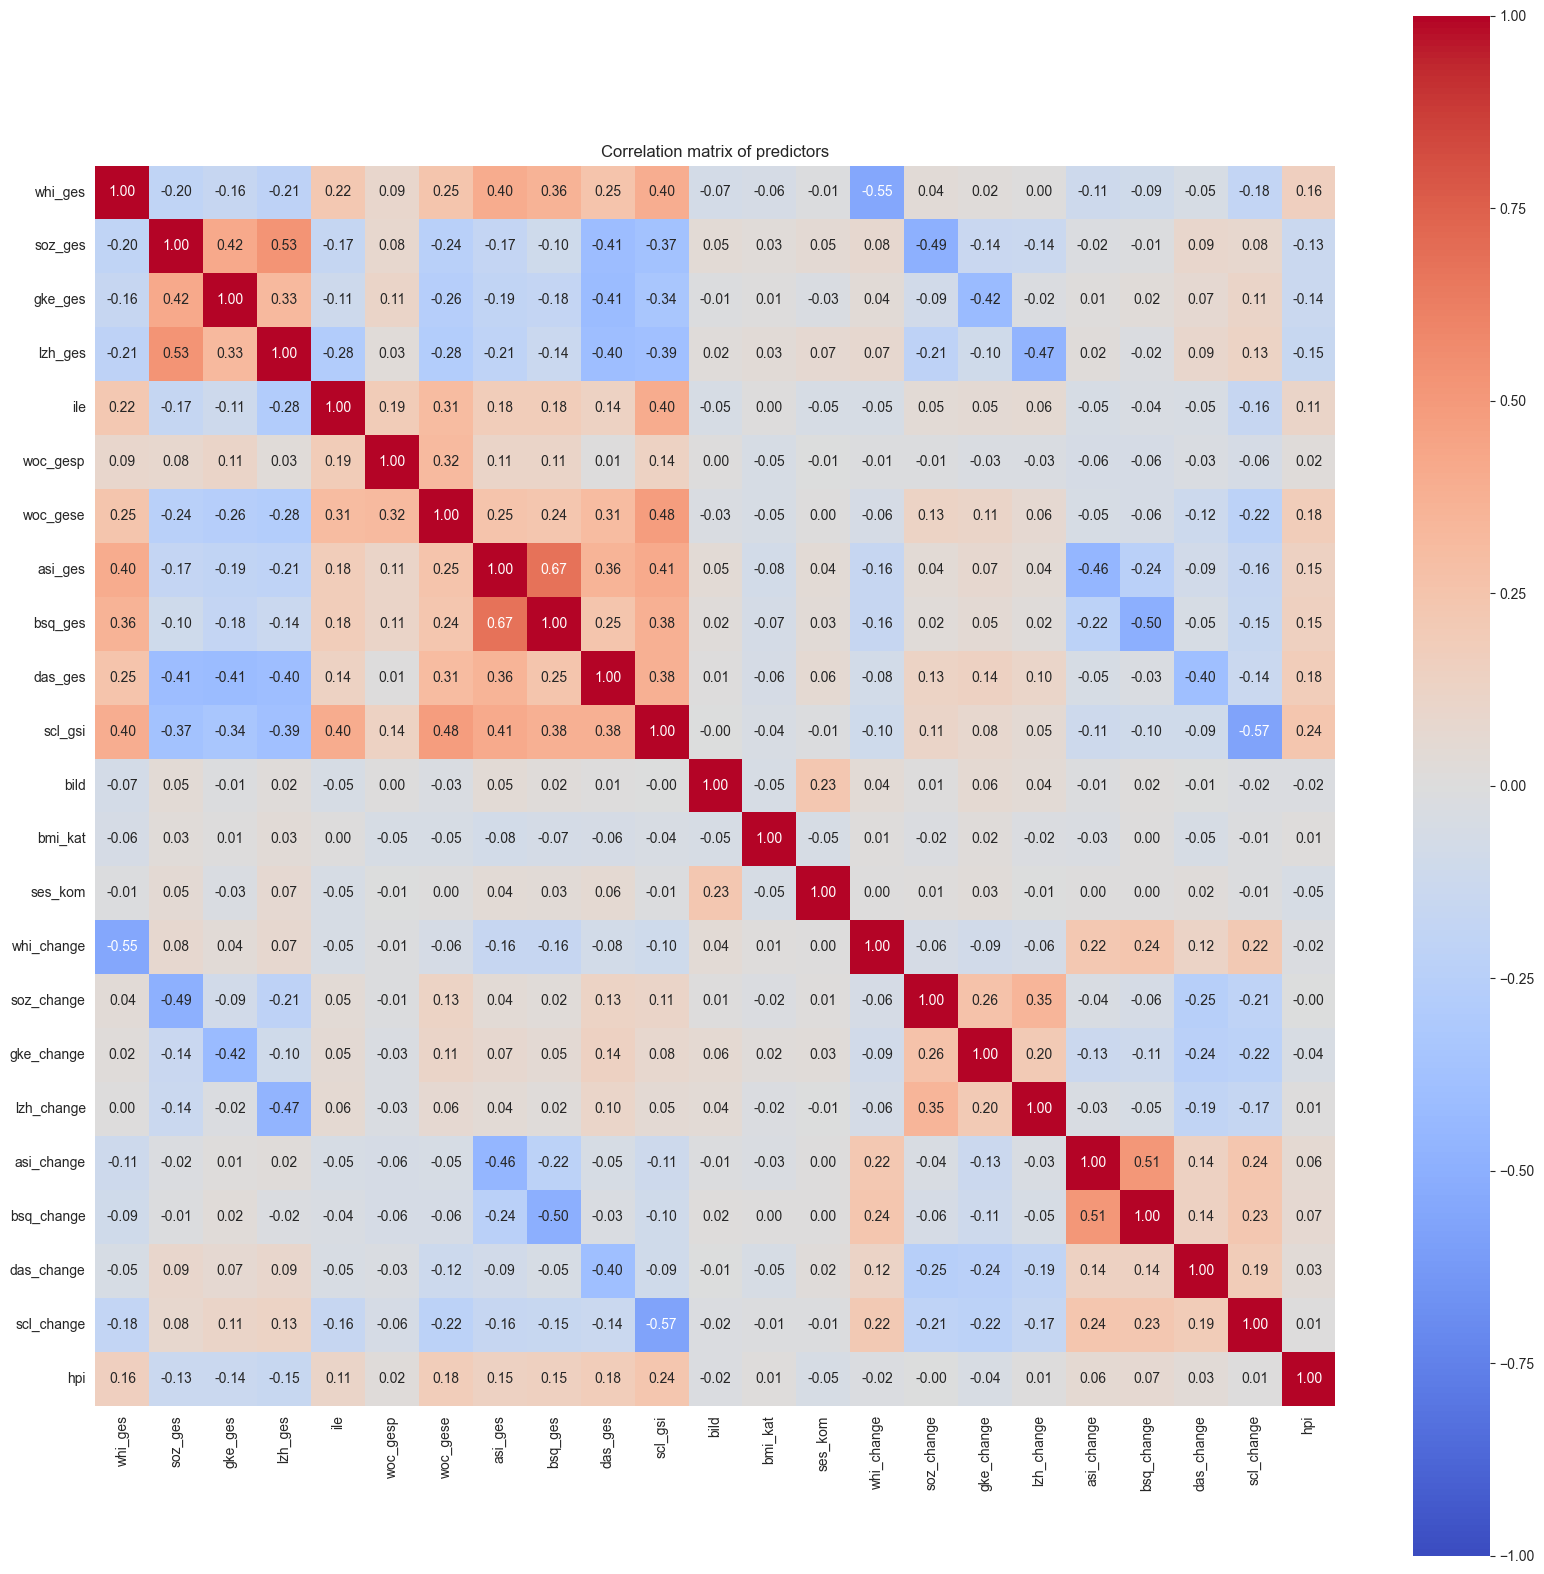

In [19]:
# get correlation matrix
corr = data.corr()
# plot correlation matrix
plt.figure(figsize = (20, 20))
sns.heatmap(corr, annot = True, fmt = ".2f", cmap = "coolwarm", square = True, vmin = -1, vmax = 1)
plt.title("Correlation matrix of predictors")

Text(0.5, 1.0, 'Correlation matrix of predictors')

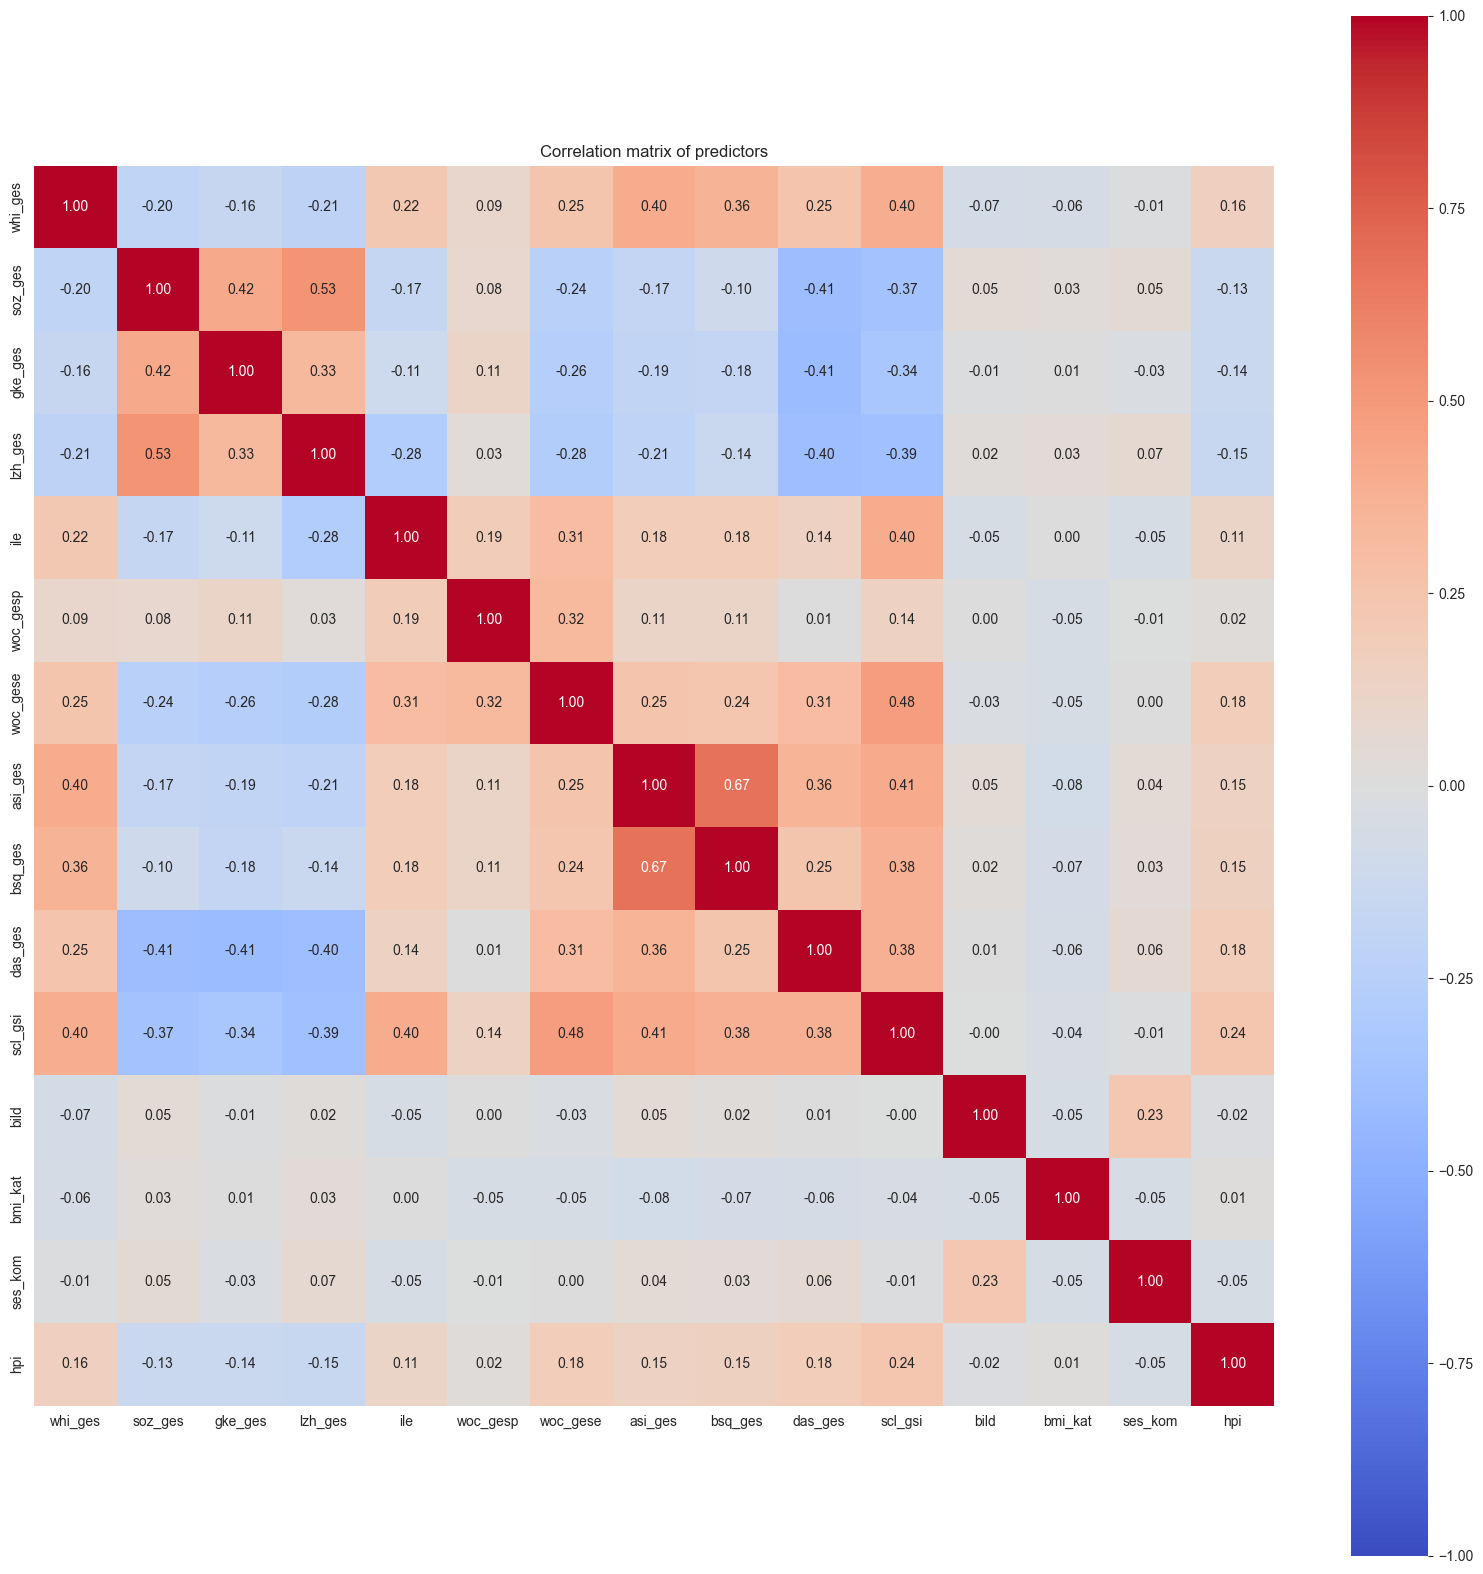

In [20]:
# get correlation matrix
corr = data_pred.corr()
# plot correlation matrix
plt.figure(figsize = (20, 20))
sns.heatmap(corr, annot = True, fmt = ".2f", cmap = "coolwarm", square = True, vmin = -1, vmax = 1)
plt.title("Correlation matrix of predictors")

## 4 Save data

In [21]:
data.to_csv("../dat/dips/DIPS_Data_cleaned_change.csv", sep = ",", index = False)
# data_pred.to_csv("../dat/dips/DIPS_Data_cleaned_pred.csv", sep = ",", index = False)
# data_pred_y.to_csv("../dat/dips/DIPS_Data_cleaned_pred_y.csv", sep = ",", index = False)

In [22]:
len(data)

1229

In [25]:
# check sd for every variable
for col in data.columns:
    print(col, round(data[col].mean(), 3), round(data[col].std(), 3))

whi_ges 0.0 1.0
soz_ges 0.0 1.0
gke_ges 0.0 1.0
lzh_ges -0.0 1.0
ile -0.0 1.0
woc_gesp 0.0 1.0
woc_gese 0.0 1.0
asi_ges -0.0 1.0
bsq_ges 0.0 1.0
das_ges 0.0 1.0
scl_gsi 0.0 1.0
bild 0.0 1.0
bmi_kat -0.0 1.0
ses_kom -0.0 1.0
whi_change -0.0 1.0
soz_change -0.0 1.0
gke_change 0.0 1.0
lzh_change 0.0 1.0
asi_change 0.0 1.0
bsq_change 0.0 1.0
das_change 0.0 1.0
scl_change -0.0 1.0
hpi 0.281 0.45
